# Naložimo paket in podatke

Naložimo potrebne pakete.

Ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic.

Določimo še stil grafov.

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime

pd.options.display.max_rows = 10

plt.style.use('ggplot')

Naložimo razpredelnice, s katerimi bomo delali.

In [36]:
recepti = pd.read_csv('recepti.csv', index_col='id')
kategorije = pd.read_csv('kategorije.csv', index_col='tag')
kategorije_receptov = pd.read_csv('rk.csv')
sestavine = pd.read_csv('sestavine.csv')

Poglejmo si podatke.

In [37]:
recepti

,title,info,num_comments,num_votes,rating,time,difficulty,date,calories
id,,,,,,,,,
1000411205330174,Mediterraner Kichererbsensalat,vegetarisches Hauptgericht,70,119,4.50,20,1,2008-03-12,895.0
1000651205335998,Caipirinha,wie man sie in Brasilien macht,10,6,3.13,15,1,2008-03-12,NaN
100071040051344,Knoblauchsuppe mit Sahne,NaN,20,28,4.13,15,0,2009-12-08,280.0
1000741205337535,Spinat auf katalanische Art,NaN,2,5,3.57,30,0,2008-03-12,NaN
100091040109216,Dezembertee,NaN,15,12,4.21,12,0,2002-12-18,NaN
...,...,...,...,...,...,...,...,...,...
999681205304867,Schmuddelwetter-Suppe,"Kartoffelsuppe mit Zucchini, Paprika, Champign...",80,60,4.24,25,1,2008-03-12,NaN
999791205310630,Apfel-Nussmuffins,ergibt ca. 20 - 24 Muffins,432,776,4.68,30,0,2008-03-12,4924.0
999861205313366,Kürbis - Curry - Kokos - Suppe,NaN,6,7,4.22,15,0,2008-03-12,NaN


In [38]:
kategorije

,kat
tag,
10,Cocktail
11,Getränk
12,Longdrink
13,Indien
14,Asien
...,...
7346,INFORM-Empfehlung
7710,Paleo
9947,ketogen


In [39]:
kategorije_receptov

,recept,kategorija
0,1000411205330174,15
1,1000411205330174,18
2,1000411205330174,27
3,1000411205330174,32
4,1000411205330174,42
...,...,...
202788,999981205317565,11
202789,999981205317565,12
202790,999981205317565,32
202791,999981205317565,50


In [40]:
sestavine

,recept,sestavina
0,1000411205330174,"Chilischote(n), frische rote"
1,1000411205330174,Feta-Käse
2,1000411205330174,Kichererbsen (800 g)
3,1000411205330174,Olivenöl
4,1000411205330174,Olivenöl zum Braten
...,...,...
258457,999891205314969,"Pfeffer, scharfer"
258458,999891205314969,"Rosmarin, frischer (ersatzweise 1 TL getrockn..."
258459,999891205314969,Salz
258460,999981205317565,Kirschsaft


# Proučevanje podatkov

## Ocena recepta

Najprej nas zanima, od česa je odvisna ocena (rating) recepta.

Oglejmo si deset najbolje ocenjenih receptov skupaj z njihovimi sestavinami in kategorijami.

In [98]:
zdruzene_sestavine = sestavine.groupby('recept')['sestavina'].apply(list).reset_index(name='sestavine')
zdruzene_kategorije = pd.merge(kategorije_receptov, kategorije, left_on='kategorija', right_on='tag').groupby('recept')
zdruzene_kategorije = zdruzene_kategorije['kat'].apply(list).reset_index(name='kategorije')
m = pd.merge(recepti, zdruzene_sestavine, left_on='id', right_on='recept')
m = pd.merge(m, zdruzene_kategorije)
m.sort_values('rating', ascending=False).reset_index().head(10)

,index,title,info,num_comments,num_votes,rating,time,difficulty,date,calories,recept,sestavine,kategorije
0,15209,Selbstgemachtes Italienisches Focaccia Brot,Fladenbrot einfach und schnell gemacht,73,124,4.90,25,0,2015-11-04,NaN,2942941446565480,"[Basilikumblätter, frischer, zum Garnieren, Bu...","[einfach, Snack, Backen, Brot oder Brötchen, Ü..."
1,11589,Köstliche BBQ Spareribs für Smoker und Backofe...,Ich mache meine Spareribs nun schon sehr lange...,462,576,4.89,60,1,2013-06-26,NaN,2338561372249308,"[BBQ-Sauce , Chilipulver , Honig , Ketchup , K...","[Sommer, Party, Hauptspeise, Schwein, Grillen]"
2,77,Lothars beste Nürnberger Elisenlebkuchen,weihnachtliches Nachbarschaftsrezept,0,0,4.88,45,0,2008-03-22,NaN,1010591206190843,"[Ei(er) , Haselnüsse, gemahlen, Honig , Kuvert...","[einfach, Weihnachten, Backen, Kekse]"
3,13640,Pikanter Dattel-Frischkäse-Dip,Geeignet als Dip oder als Brotaufstrich.,251,522,4.88,5,1,2014-11-23,NaN,2653511416758959,"[Currypulver , Frischkäse , Harissa oder schar...","[Käse, Saucen, Dips, Aufstrich, Frucht]"
4,4945,Schneemoussetorte mit Rhabarber,NaN,131,232,4.87,90,1,2009-11-04,4251.0,1521151257327860,"[Backpulver , Butter , Ei(er) , Fett für die F...","[Vegetarisch, Backen, Frühling, Torte]"
5,13579,Die perfekten Hamburgerbrötchen,NaN,158,272,4.87,15,1,2014-12-30,285.0,2642351415194117,"[Butter, weich, Ei(er) , Hefe, frisch, Mehl (T...","[Vegetarisch, Backen, Brot oder Brötchen]"
6,15058,Dattelcreme,Orientalisch exotisch,73,152,4.87,15,0,2015-10-01,NaN,2911251443383530,"[Currypulver , Frischkäse , Harissapaste , Kno...","[Vegetarisch, einfach, Saucen, Dips, Frucht]"
7,12359,Amerikanisches Gurkenrelish für eine Hamburger...,Sweet Pickle Relish for Hamburger Sauce,120,44,4.87,15,0,2013-11-27,NaN,2446211385409096,"[Apfelessig , Gurke(n), geschält, die Samenkör...","[Gemüse, Vegetarisch, einfach, Haltbarmachen, ..."
8,14675,Hamburger und Hot Dog Buns,Für ca. 7 Burgerbrötchen,241,352,4.87,30,0,2015-07-07,2219.0,2841831436245733,"[Ei(er) , Frischhefe, 1/2 Würfel, Honig , Milc...","[Vegetarisch, einfach, Backen, Brot oder Brötc..."
9,24946,Grießbrei von Großmutter,"luftig, locker und lecker",0,0,4.87,15,1,2007-12-04,303.0,914031196710118,"[Butter , Ei(er) , Milch , Salz , Vanillezucke...","[Vegetarisch, einfach, Camping, Studentenküche..."


### Težavnost

Domnevamo, da so zahtevnejši recepti slabše ocenjeni od enostavnih, saj neveščim kuharjem pogosto jedi ne uspe pripraviti, kot bi si želeli. Posledično recept slabše ocenijo, saj ne priznajo svoje nesposobnosti.

In [42]:
recepti.groupby('difficulty')['rating'].mean()

difficulty
0    4.186186
1    4.244788
2    4.210921
Name: rating, dtype: float64

### Čas priprave

Ker je kuharjev čas zelo cenjen, tega ne gre zanemariti. Dober recept ne bo zahteval dolge priprave, če ta ni potrebna. Domnevamo, da so recepti, ki kuharju vzamejo manj časa in gostitelja rešijo prazne mize pred nenapovedanimi obiski, bolje ocenjeni.

<AxesSubplot: xlabel='time'>

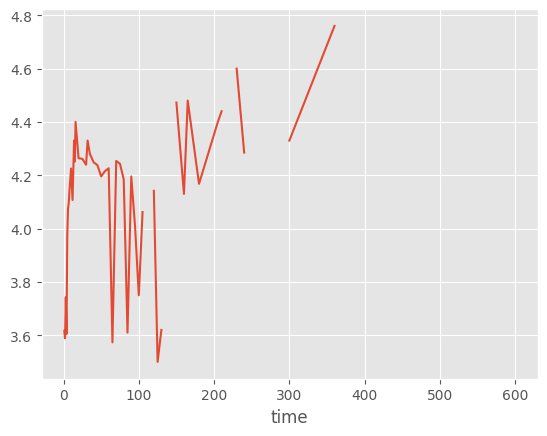

In [43]:
recepti.groupby('time')['rating'].mean().plot()

### Sestavine

Nekatere sestavine so preprosto bolj priljubljene od ostalih. Zanima nas, katere sestavine povzročijo večjo priljubljenost jedi.

Najprej uredimo tabelo _sestavine_. Opazimo, da se ista sestavina v njej pojavlja pod različnimi imeni - sestavine imajo pogosto za vejico zapisanih še nekaj podrobnosti (npr. za kaj jo bomo uporabili, ali naj bo sladkor bel ali rjav ipd.).
Teh podatkov tukaj ne želimo vključiti v analizo - olje naj bo le olje in ne olje za pečenje oz. olje za cvrenje, sladkor pa le sladkor in ne beli/rjavi sladkor. Zato dele sestavin za vejico odstranimo. Novo tabelo poimenujemo *splosne_sestavine*.

In [44]:
def odstrani_del_za_vejico(sestavina: str):
    s = sestavina.split(",")
    return s[0]

In [45]:
splosne_sestavine = sestavine.copy()
splosne_sestavine['sestavina'] = sestavine['sestavina'].apply(odstrani_del_za_vejico)

Nato združimo tabeli *splosne_sestavine* in _recepti_. Ker nas pri tabeli _recepti_ zanima le rating, jo zožimo.

In [46]:
splosne_sestavine_z_ratingom = pd.merge(splosne_sestavine, recepti['rating'], left_on='recept', right_on='id')

Dobimo seznam najbolj priljubljenih sestavin in povprečno oceno receptov s to sestavino. Dodamo še stolpec s številom pojavitev posamezne sestavine v receptih.

In [47]:
a = splosne_sestavine_z_ratingom.groupby('sestavina')
a1 = a['rating'].mean().rename('rating')
a2 = a.size().rename('število pojavitev')
rating_sestavine = pd.merge(a1, a2, on='sestavina').sort_values(by='rating', ascending=False)
rating_sestavine

,rating,število pojavitev
sestavina,,
Olivenöl zum Bestreichen der Backform,4.90,1
Rippchen (Loin Ribs),4.89,1
Marinade (von dem Rub),4.89,1
Harissa oder scharfer Ajvar,4.88,1
Zucker und 4-5 EL extra,4.87,1
...,...,...
Zwetschgenwasser,NaN,1
Zwiebelsaft,NaN,1
saure Sahne oder Schlagsahne,NaN,1


Opazimo, da veliko sestavin nastopa le v enem (sicer dobro ocenjenem) receptu. Ker ne želimo zaključkov o priljubljenosti sestavine delati le na podlagi majhnega števila receptov, iz tabele odstranimo vrstice s sestavinami, ki se pojavljajo v manj kot desetih receptih.

In [48]:
rating_sestavine[rating_sestavine['število pojavitev'] >= 10]

,rating,število pojavitev
sestavina,,
Roggenmehl Type 1150,4.670000,12
Rindergulasch,4.591818,11
Kakaopulver zum Bestäuben,4.589091,11
Fett für das Blech,4.579000,20
Gelee,4.568182,11
...,...,...
Cola,3.425455,13
Campari,3.405122,59
Angostura,3.379167,14


### Kategorija

Radi bi ugotovili še, katerim kategorijam pripradajo najbolj priljubljeni recepti.

### Kalorična vrednost

Še tako nepriljubljene sestavine lahko izboljšamo z dobro mero olja ali sladkorja. To pa seveda poviša kalorično vrednost jedi. Domnevamo, da so jedi z visoko kalorično vrednostjo okusnejše in zato bolje ocenjene.

Podatke o kaloričnih vrednostih zaokrožimo na stotice, da bo graf bolj pregleden.

<AxesSubplot: xlabel='calories'>

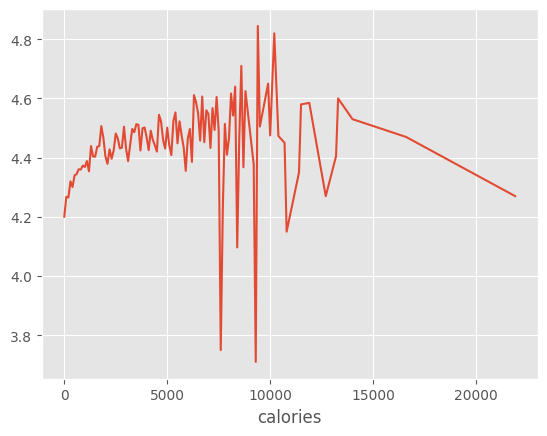

In [49]:
recepti_kalorije = recepti.copy()
recepti_kalorije['calories'] = (recepti_kalorije['calories'] / 100).round() * 100
recepti_kalorije.groupby('calories')['rating'].mean(numeric_only=True).plot()

## Čas priprave

### Zahtevnost

Zahtevni recepti najverjetneje zahtevajo daljšo pripravo. Preverimo.

<AxesSubplot: xlabel='difficulty'>

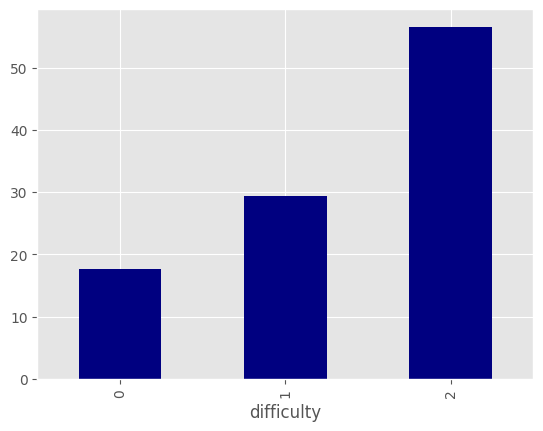

In [50]:
recepti.groupby('difficulty')['time'].mean().plot.bar(color='navy')

## Število ocen in komentarjev

Zanima nas, s čim je povezano število ocen in komentarjev ter kakšna je odvisnost med tema številoma.

### Ocena recepta

Ker so kuharji dobri po duši in raje pohvalijo, kot pa se nad receptom zgražajo, pričakujemo, da bodo bolje ocenjeni recepti tudi večkrat ocenjeni in komentirani. Preverimo.

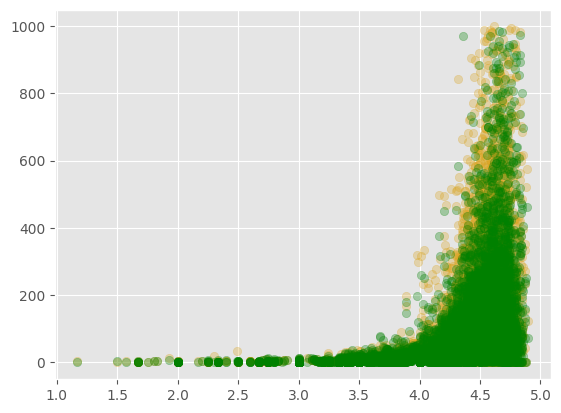

In [51]:
plt.scatter(x=recepti['rating'],y=recepti['num_votes'], alpha=0.3, color='goldenrod')
plt.scatter(x=recepti['rating'],y=recepti['num_comments'], alpha=0.3, color='green')

Zgornji graf je precej nepregleden. Izrišimo še graf povprečnega števila glasov in komentarjev glede na oceno recepta, zaokroženo na eno decimalno mesto.

<AxesSubplot: xlabel='rating'>

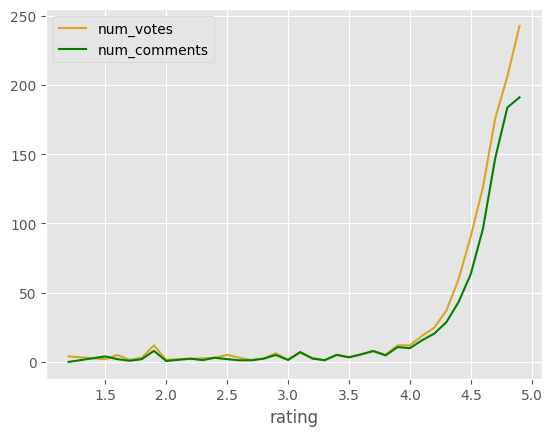

In [52]:
recepti_z_zaokrozenim_ratingom = recepti.copy()
recepti_z_zaokrozenim_ratingom['rating'] = recepti_z_zaokrozenim_ratingom.rating.round(1)
recepti_z_zaokrozenim_ratingom = recepti_z_zaokrozenim_ratingom.groupby('rating')[['num_votes', 'num_comments']]
recepti_z_zaokrozenim_ratingom.mean().plot(color=['goldenrod', 'green'])

Na tem grafu je odvisnost bolje vidna.

Začetna domneva je sicer resnična, vendar za to najbrž niso krivi dobrodušni kuharji, ampak algoritem, ki iskalcu recepta najprej ponudi boljše (tj. bolje ocenjene) recepte. Prav tako so ti večkrat preizkušeni, saj se kuharji prej lotijo dobro ocenjene jedi od tiste, ki je ocenjena slabše. Posledično so zato dobri recepti večkrat ocenjeni in komentirani.

### Zahtevnost

Pri zahtevnejših receptih imajo kuharji več vprašanj za avtorja, zato imajo zahtevni recepti domnevno več komentarjev.

<AxesSubplot: xlabel='difficulty'>

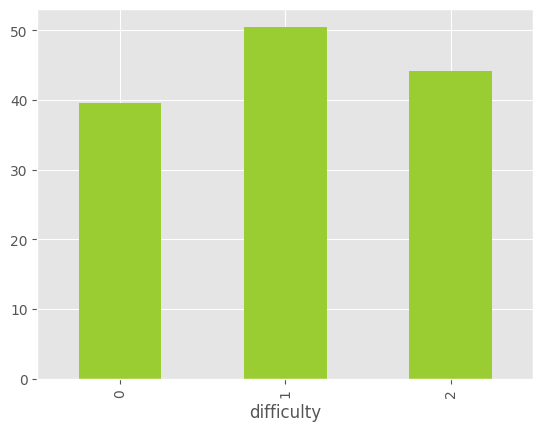

In [53]:
recepti.groupby('difficulty')['num_comments'].mean().plot.bar(color='yellowgreen')

### Čas objave

Recepti, ki so objavljeni že dalj časa, imajo več ocen in komentarjev.

<AxesSubplot: xlabel='date'>

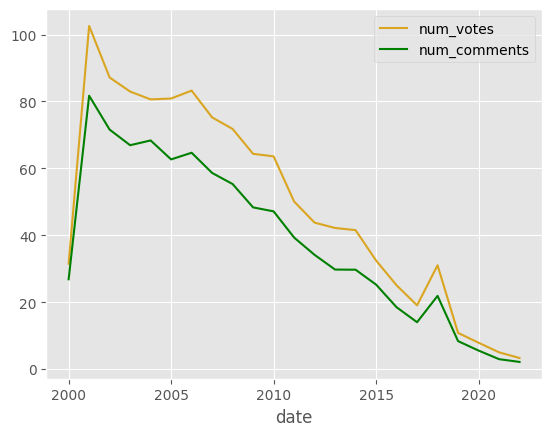

In [54]:
def leto(datum):
    datum = datetime.date.fromisoformat(datum).year
    return datum

recepti_po_letih = recepti.copy()[['date', 'num_votes', 'num_comments']].sort_values('date')
leta = recepti_po_letih['date'].apply(leto)
recepti_po_letih['date'] = leta
recepti_po_letih.groupby('date').mean().plot(color=['goldenrod', 'green'])

### Odvisnost med številom ocen in komentarjev

Izgleda, da je zveza med številom ocen in komentarjev linearna. Izrišimo še ta graf.

<AxesSubplot: xlabel='num_votes', ylabel='num_comments'>

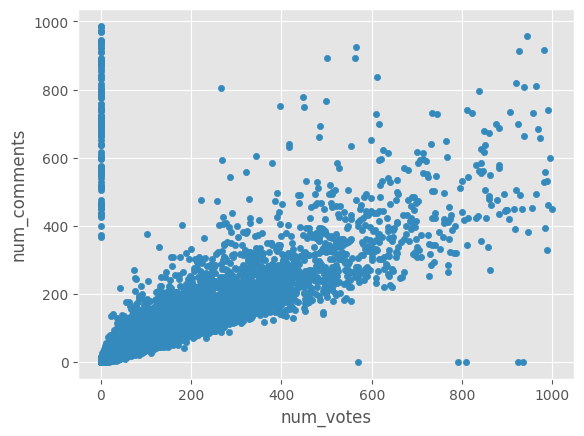

In [55]:
recepti.plot.scatter(x='num_votes', y='num_comments')

## Kategorije

Ali bi lahko zgolj na podlagi sestavin določili, v katere kategorije spada recept?

Na vprašanje poskusimo odgovoriti s pomočjo naivnega Bayesovega klasifikatorja.

Najprej določimo, kolikokrat se posamezna sestavina pojavi med recepti in kolikšna je verjetnost, da ima naključno izbrani recept med navedenimi sestavinami to sestavino. Še prej tabelo s podatki o kategorijah preoblikujemo v bolj razumljivo obliko (namesto enoličnega idja kategorije zapišemo njeno ime).

In [92]:
kategorije_z_imeni = pd.merge(kategorije_receptov, kategorije, left_on='kategorija', right_on='tag')[['recept', 'kat']]
pojavitve_kategorij = kategorije_z_imeni.groupby('kat').size()
verjetnosti_kategorij = pojavitve_kategorij / len(recepti)

Ker imajo navedene sestavine v receptu pogosto za vejico zapisanih še nekaj podrobnosti (npr. za kaj bomo to sestavino potrebovali, ali naj bo sladkor bel ali rjav ipd.), ki jih ne želimo analizirati, dele sestavin za vejico odstranimo.

To smo že naredili pri analiziranju priljubljenosti sestavin, ustrezno tabelo pa smo poimenovali *splosne_sestavine*.

In [95]:
sestavine_kategorij = pd.merge(splosne_sestavine, kategorije_z_imeni)
stolpec_verjetnosti_sestavin_pri_kategorijah = sestavine_kategorij.groupby(['kat', 'sestavina']).size() / pojavitve_kategorij
verjetnosti_sestavin_pri_kategorijah = stolpec_verjetnosti_sestavin_pri_kategorijah.unstack().transpose().fillna(1 / len(recepti))
verjetnosti_sestavin_pri_kategorijah

kat,Afrika,Amerika,Asien,Auflauf,Aufstrich,Australien,Babynahrung,Backen,Backen oder Süßspeise,Basisrezepte,...,marinieren,neu,raffiniert oder preiswert,spezial,tee,warm,Ägypten,Österreich,Überbacken,öl
sestavina,,,,,,,,,,,,,,,,,,,,,
8 Kräuter,0.000039,0.000039,0.000039,0.000796,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039
Aal(e),0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.001988,0.000039,0.000815,0.000039,0.000039,0.000039,0.000039
Aal(e) (-filet),0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039
Aal(e) - Filet (geräuchert),0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039
Absinth,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Öl zum Frittieren und zum Braten,0.000039,0.000039,0.000507,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039
Öl zum Marinieren,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039
Öl zum Rösten,0.000039,0.000039,0.000039,0.000039,0.000913,0.000039,0.000039,0.000039,0.000039,0.000039,...,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039,0.000039


Definiramo funkcijo, ki sprejme seznam sestavin in vrne prvih pet kategorij, v katere najverjetneje sodi recept z danimi sestavinami.

In [96]:
def kategorija_iz_sestavin(sestavine):
    """Funkcija sprejme seznam sestavin (nizov) in vrne imena prvih petih kategorij, 
    v katere najverjetneje sodi recept s sestavinami s tega seznama."""
    sestavine_brez_konca = [odstrani_del_za_vejico(sestavina) for sestavina in sestavine]
    r = verjetnosti_sestavin_pri_kategorijah.reset_index()
    verjetnosti = r[r.sestavina.isin(sestavine_brez_konca)].product(numeric_only=True) * verjetnosti_kategorij
    return verjetnosti.sort_values(ascending=False).head(5)

In [99]:
ses = ["Chilischote(n), frische rote", "Feta-Käse", "Kichererbsen (800 g)", "Olivenöl", "Olivenöl zum Braten", "Paprikaschote(n)","Petersilie, glatte ", "Rotweinessig", "Salz", "Zitronensaft", "Zucchini", "Zucker", "Zwiebel(n), rote "]
kategorija_iz_sestavin(ses)

kat
Salat           1.249965e-25
Gemüse          3.202782e-26
kalt            2.593261e-26
Vorspeise       8.265845e-27
Griechenland    5.273632e-27
dtype: float64

# Komentar

nekatere kategorije imajo slabšo povprečno oceno le zato, ker je tam manj receptov (spletna stran pokaže prvih 1000, ki so navadno bolje ocenjeni; če je receptov manj, spletna stran pokaže vse, med drugim tudi slabše ocenjene)

tudi pri preostali obdelavi podatkov bi lahko šlo za odvisnost od kategorije, ne od ocene oz. odvisnost kategorije od nečesa, ne odvisnost ocene od nečesa

nekatere vrstice v sestavinah so podvojene, ker so takšni recepti

b = kategorije_receptov.sort_values(['recept', 'mesto'], ascending=True) != kategorije_receptov.sort_values(['recept', 'kategorija'], ascending=True)

c = b['recept'] | b['kategorija'] | b['mesto']

kategorije_receptov[c]

In [57]:
recepti.sort_values('rating')

,title,info,num_comments,num_votes,rating,time,difficulty,date,calories
id,,,,,,,,,
394851128252288,Caipirinha,Deutsche Version,0,4,1.17,5,0,2005-10-03,NaN
1510301256335678,Blutige Halloween - Kartoffeln,gruselige Überraschung nicht nur zu Halloween,4,2,1.50,20,0,2009-10-26,232.0
483441142417762,Titanic - Bowle (alkoholfrei),alle Zutaten sind fertig zu kaufen,2,5,1.57,15,0,2006-03-15,NaN
657501167480550,Kürbissuppe mit Feta,NaN,0,1,1.67,15,1,2006-12-30,NaN
1253371230579026,Kalte Händchen - Bowle,für Halloween oder extravagante Partys,0,1,1.67,30,0,2008-12-30,NaN
...,...,...,...,...,...,...,...,...,...
927931198071644,Cocktail 'Never Forget',NaN,0,0,NaN,5,0,2007-12-19,NaN
936361199270287,Honig - Chili - Kürbis,für 16 Gläser zu je 400 g,4,0,NaN,60,1,2008-01-02,NaN
979021203444228,Milka - Halloweentorte,auch prima für jede andere Gelegenheit,0,0,NaN,45,1,2008-02-20,NaN


Pri oceni v odvisnosti od kalorij lahko kalorije zaokrozimo na nekaj in naredimo tako

sestavine se ponavljajo, ker so recepti čudni

In [58]:
zdruzene_sestavine = sestavine.groupby('recept')['sestavina'].apply(list).reset_index(name='sestavine')
pd.merge(recepti, zdruzene_sestavine, left_on='id', right_on='recept')

,title,info,num_comments,num_votes,rating,time,difficulty,date,calories,recept,sestavine
0,Mediterraner Kichererbsensalat,vegetarisches Hauptgericht,70,119,4.50,20,1,2008-03-12,895.0,1000411205330174,"[Chilischote(n), frische rote, Feta-Käse , Kic..."
1,Caipirinha,wie man sie in Brasilien macht,10,6,3.13,15,1,2008-03-12,NaN,1000651205335998,"[Cachaça , Eis, kann auch Crush-Eis sein, Lime..."
2,Knoblauchsuppe mit Sahne,NaN,20,28,4.13,15,0,2009-12-08,280.0,100071040051344,"[Brühe, klare oder Gemüsebrühe, Butter , Knobl..."
3,Spinat auf katalanische Art,NaN,2,5,3.57,30,0,2008-03-12,NaN,1000741205337535,"[Knoblauch, gehackt, Olivenöl , Pinienkerne , ..."
4,Dezembertee,NaN,15,12,4.21,12,0,2002-12-18,NaN,100091040109216,"[Honig , Orange(n), den Saft davon, Orangenlik..."
...,...,...,...,...,...,...,...,...,...,...,...
25694,Schmuddelwetter-Suppe,"Kartoffelsuppe mit Zucchini, Paprika, Champign...",80,60,4.24,25,1,2008-03-12,NaN,999681205304867,"[Bratwurst, grob, Champignons , Kartoffel(n) ,..."
25695,Apfel-Nussmuffins,ergibt ca. 20 - 24 Muffins,432,776,4.68,30,0,2008-03-12,4924.0,999791205310630,"[Backpulver , Butter , Ei(er) , Mehl , Puderzu..."
25696,Kürbis - Curry - Kokos - Suppe,NaN,6,7,4.22,15,0,2008-03-12,NaN,999861205313366,"[Curry , Gemüsebrühe, gekörnte, Kokosmilch ode..."
25697,Bratkartoffeln nach mediterraner Art,knusprig und ohne Vorkochen von Kartoffeln,34,49,4.43,25,0,2008-03-12,166.0,999891205314969,"[Kartoffel(n), vorwiegend fest kochende, Knobl..."


Za konec preverimo še, ali je letno objavljenih receptov vedno več.

Boljši/slabši, zahtevnejši, časovno bolj potratni